In [1]:
from shared.preface import *
import shared.functions as fct
import shared.my_units as my
import shared.control_center as CC

0.05632233059226802
0.2698226647505907
0.437141280523483
3.543959841682149


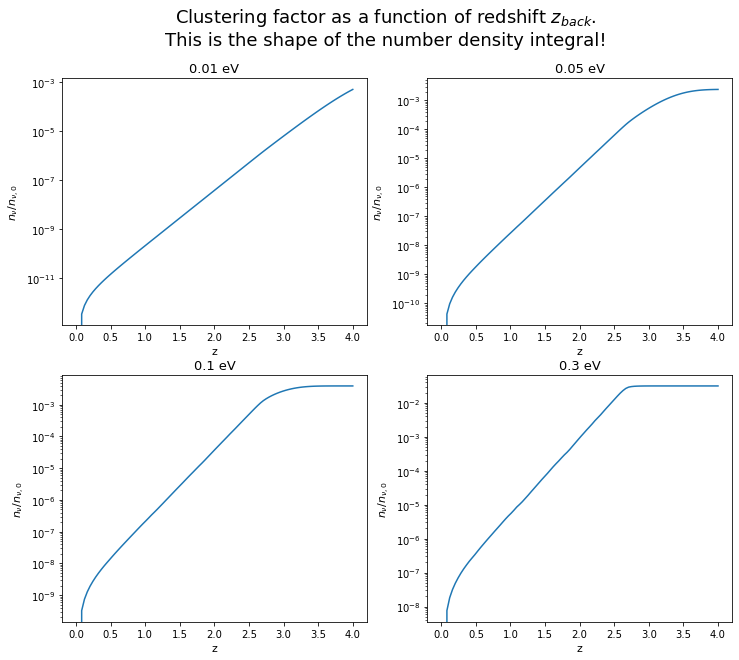

In [4]:
def n_nu_of_redshift(m_sim_eV, m_nu_eV):

    # load initial and final velocity
    Ns = np.arange(CC.NR_OF_NEUTRINOS, dtype=int)  # Nr. of neutrinos
    u0 = [np.load(f'neutrino_vectors/nu_{Nr+1}.npy')[0][3:6] for Nr in Ns]
    u1 = [np.load(f'neutrino_vectors/nu_{Nr+1}.npy')[-1][3:6] for Nr in Ns]
    u0, u1 = np.array(u0), np.array(u1)

    n_nus = np.zeros(CC.Z_AMOUNT)
    for i in range(CC.Z_AMOUNT):

        # Get momenta.
        p0, _ = fct.u_to_p_eV(u0, m_sim_eV, m_nu_eV)
        p1, _ = fct.u_to_p_eV(u1, m_sim_eV, m_nu_eV)

        # Calculate number density.
        n_nus[i] = fct.number_density(p0[:i], p1[:i]).value

    np.save(f'neutrino_data/number_densities_at_z_{m_nu_eV.value}eV.npy', n_nus)


z_array = np.linspace(CC.Z_START, CC.Z_STOP, CC.Z_AMOUNT)

fig, axs = plt.subplots(2,2, figsize=(12,10))
fig.suptitle(
    r'Clustering factor as a function of redshift $z_{back}.$'
    '\n'
    'This is the shape of the number density integral!', fontsize=18)

masses = np.array([0.01, 0.05, 0.1, 0.3])*unit.eV
for j, m in enumerate(masses):
    n_nu_of_redshift(CC.NU_MASS, m)

    n_nus = np.load(f'neutrino_data/number_densities_at_z_{m.value}eV.npy')

    i = 0
    if j in (2,3):
        i = 1
        j -= 2

    axs[i,j].semilogy(z_array, n_nus/112)
    axs[i,j].set_title(f'{m.value} eV')
    axs[i,j].set_xlabel('z')
    axs[i,j].set_ylabel(r'$n_{\nu} / n_{\nu, 0}$')
    print(n_nus[-1])

plt.savefig('check_plots/figure_4.pdf')
plt.show()

#! Values don't start at redshift 0 exactly, since z array starts at 1e-10.